<a href="https://colab.research.google.com/github/khushi-narang/digit_recognition/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

digit_recognizer_path = kagglehub.competition_download('digit-recognizer')

print('Data source import complete.')


100%|██████████| 15.3M/15.3M [00:00<00:00, 133MB/s]

Extracting files...


Data source import complete.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv(digit_recognizer_path + '/train.csv')
df_test = pd.read_csv(digit_recognizer_path + '/test.csv')

In [ ]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [ ]:
data = df_train
# Split into features and labels
X = data.iloc[:, 1:].values  # All pixel columns
y = data.iloc[:, 0].values   # Label column

# Normalize pixel values (0-255 → 0-1)
X = X / 255.0

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=10)

# Reshape for neural network
X = X.reshape(-1, 28, 28, 1)  # Assuming 28x28 images


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten 28x28 images
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 digits
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8430 - loss: 0.5361 - val_accuracy: 0.9415 - val_loss: 0.1862
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9585 - loss: 0.1354 - val_accuracy: 0.9619 - val_loss: 0.1271
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9730 - loss: 0.0883 - val_accuracy: 0.9688 - val_loss: 0.1059
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9821 - loss: 0.0594 - val_accuracy: 0.9643 - val_loss: 0.1156
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9858 - loss: 0.0472 - val_accuracy: 0.9743 - val_loss: 0.0861
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9881 - loss: 0.0353 - val_accuracy: 0.9693 - val_loss: 0.1052
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9911 - loss: 0.0301 - val_accuracy: 0.9702 - val_loss: 0.1082
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9938 - loss: 0.0231 - 

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.1311
Validation Accuracy: 97.18%


263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


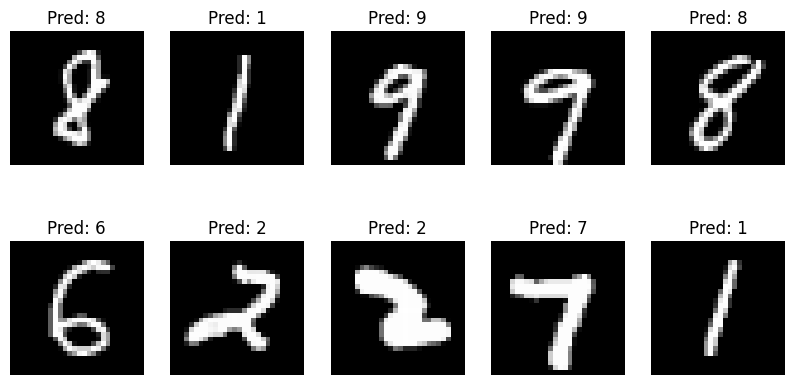

In [ ]:
predictions = model.predict(X_val)
predicted_labels = np.argmax(predictions, axis=1)

# Display some predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_val[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis("off")
plt.show()


In [ ]:
predictions = model.predict(df_test.values.reshape(-1, 28, 28, 1) / 255.0)
predicted_labels = np.argmax(predictions, axis=1)


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
submission_df = pd.DataFrame({
    "ImageId": np.arange(1, len(predicted_labels) + 1),
    "Label": predicted_labels
})


In [ ]:
submission_df.to_csv("submission.csv", index=False)
